# 3 Hands On: Data Exploration

## 1 Summarization
Load the data set carIns final. It already has the imputation of missing values

### 1. Using the package dplyr, answer the following questions:

In [2]:
library("dplyr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




(a) Obtain the number of cars by bodyStyle

In [3]:
df <- load("../data/03_dataexplor/carIns_final.Rdata")

carIns_final %>%
   group_by(bodyStyle) %>%
   count()



bodyStyle,n
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


(b) Obtain the number of cars by bodyStyle and fuelType.

In [4]:
carIns_final %>%
   group_by(bodyStyle, fuelType) %>%
   count()

bodyStyle,fuelType,n
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


(c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.

In [5]:
carIns_final %>%
   group_by(bodyStyle) %>%
   summarise(
      cityMpg.mean=mean(cityMpg), 
      cityMpg.sd = sd(cityMpg)
   )

bodyStyle,cityMpg.mean,cityMpg.sd
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
hatchback,26.31429,7.169870
sedan,25.32292,6.599035
wagon,24.04000,4.217819


(d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.

In [6]:
carIns_final %>%
   group_by(bodyStyle) %>%
   summarise(
      cityMpg.mean=mean(cityMpg), 
      cityMpg.sd = sd(cityMpg),
      cityMpg.median = median(cityMpg),
      highwayMpg.mean = mean(highwayMpg),
      highwayMpg.sd = sd(highwayMpg),
      highwayMpg.median = median(highwayMpg),
      carretera = IQR(highwayMpg)
   )


bodyStyle,cityMpg.mean,cityMpg.sd,cityMpg.median,highwayMpg.mean,highwayMpg.sd,highwayMpg.median,carretera
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,3.391165,21,26.00000,4.289522,27.0,3.00
hardtop,21.62500,5.423165,23,27.25000,6.088631,27.5,5.00
hatchback,26.31429,7.169870,26,32.17143,7.044314,31.5,11.75
sedan,25.32292,6.599035,25,30.83333,7.174027,30.5,11.25
wagon,24.04000,4.217819,24,28.72000,4.703899,29.0,7.00


# 2 Visualization

## 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

(e) Show the relationship between the attributes cityMpg and highwayMpg

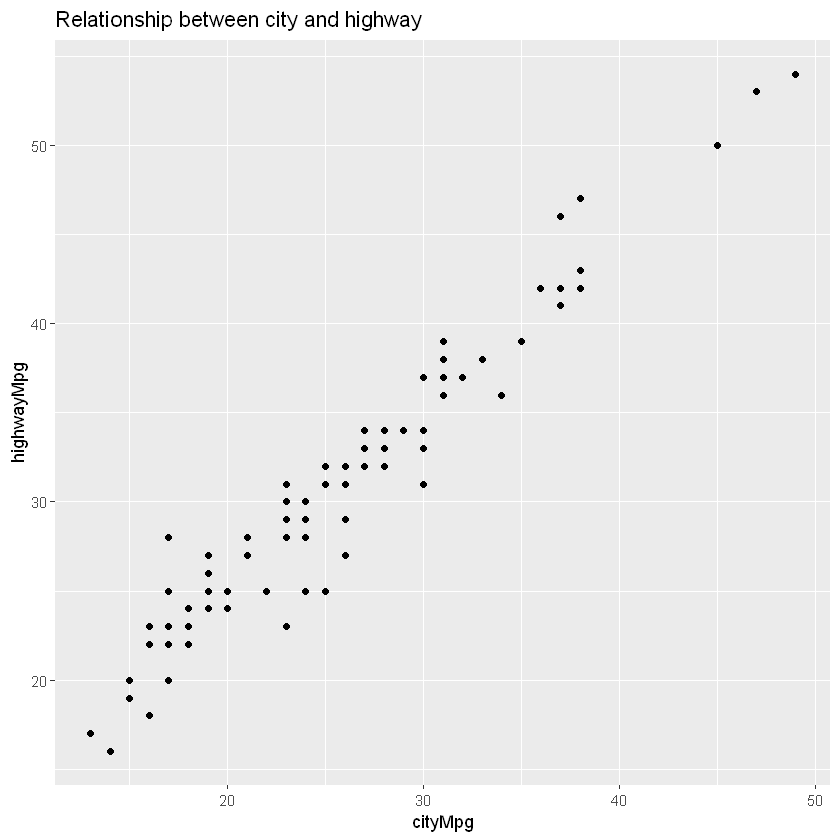

In [7]:
library("ggplot2")

ggplot(carIns_final, aes(x = cityMpg, y=highwayMpg)) +
   geom_point() +
   ggtitle("Relationship between city and highway")

(f) Show the distribution of cars by bodyStyle.

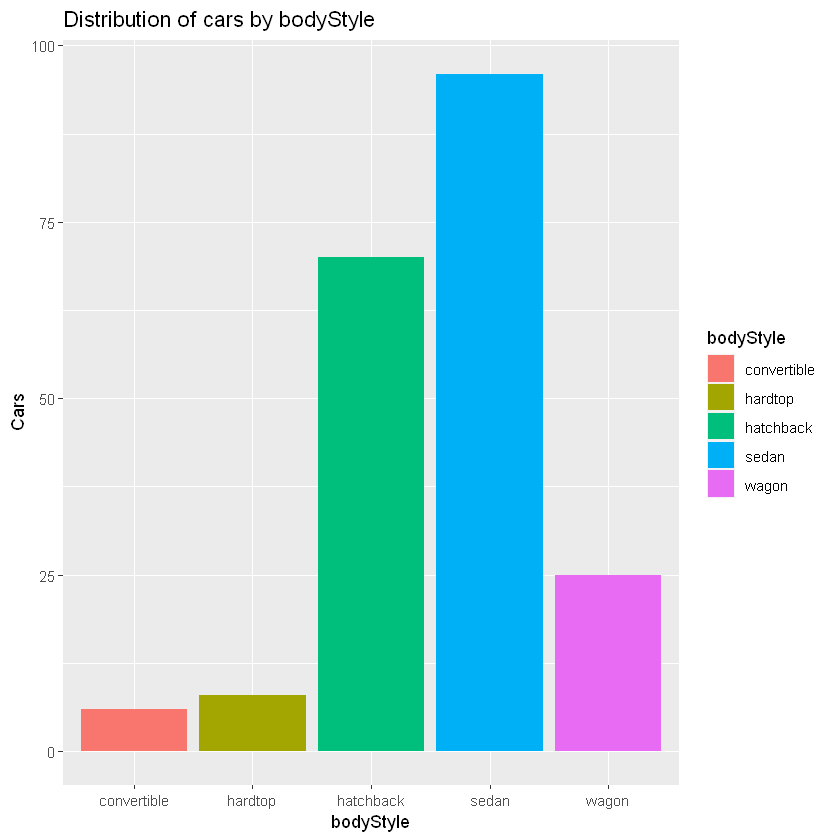

In [8]:
ggplot(carIns_final, aes(x = bodyStyle, fill=bodyStyle)) +
   geom_bar() +
   ggtitle("Distribution of cars by bodyStyle")+
   xlab("bodyStyle") + ylab("Cars") 

(g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

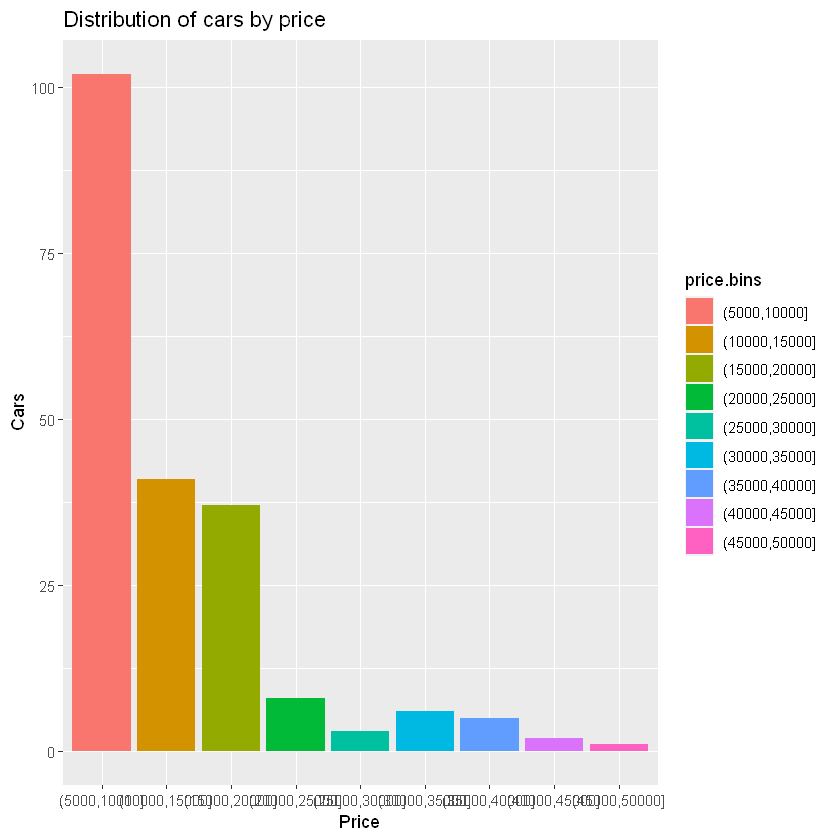

In [9]:
carIns_final <- carIns_final %>%
   mutate(price.bins = cut(price, breaks= 5000*(0:10),dig.lab=5))

disCarByPrice <- carIns_final %>%
   ggplot(aes(x = price.bins, fill=price.bins)) +
   geom_bar(position="stack") +
   ggtitle("Distribution of cars by price") +
   xlab("Price") + ylab("Cars") 

disCarByPrice

(h) Add the information of the density estimation to the previous graph.

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


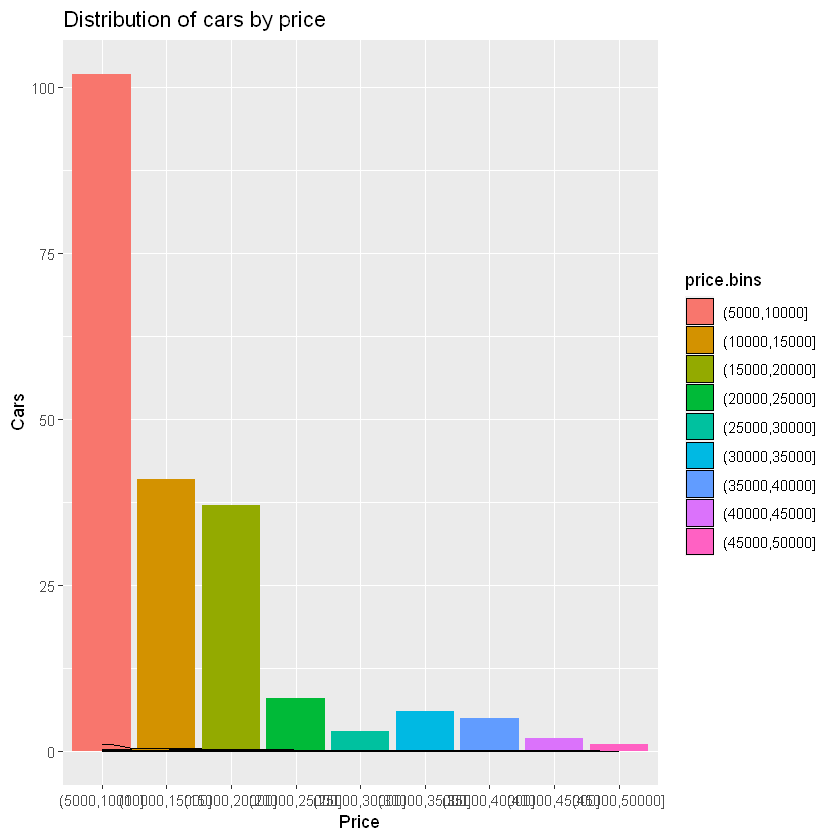

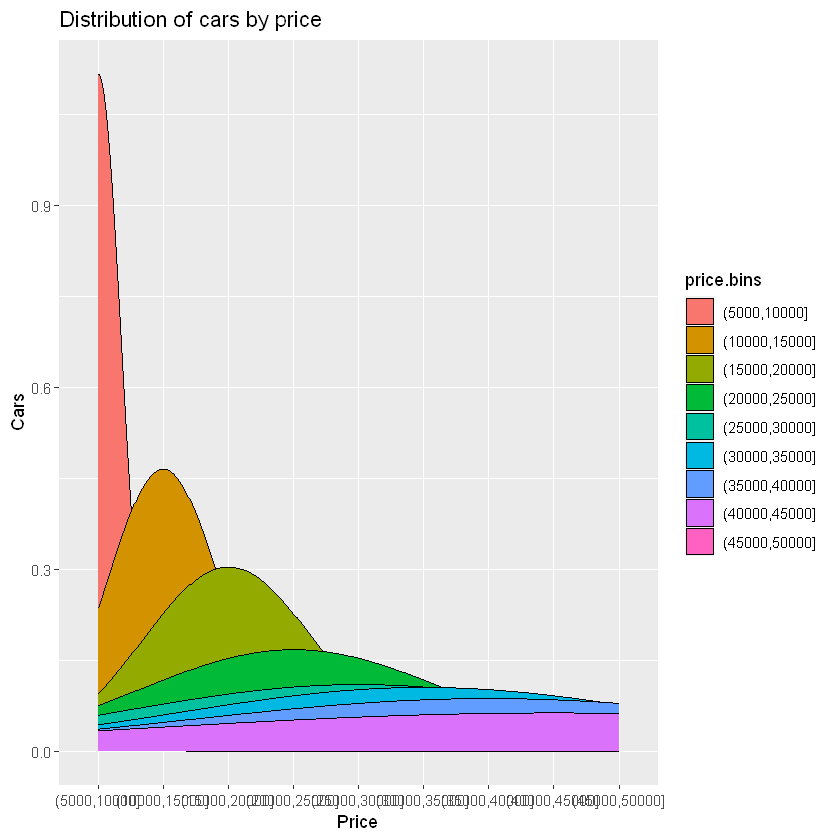

In [10]:
disCarByPrice +
   geom_density() 

carIns_final %>%
   ggplot(aes(x = price.bins, fill=price.bins)) +
   geom_density() +
   ggtitle("Distribution of cars by price") +
   xlab("Price") + ylab("Cars") 

(i) Check (visually) if it is plausible to consider that price follows a normal distribution.

(j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().

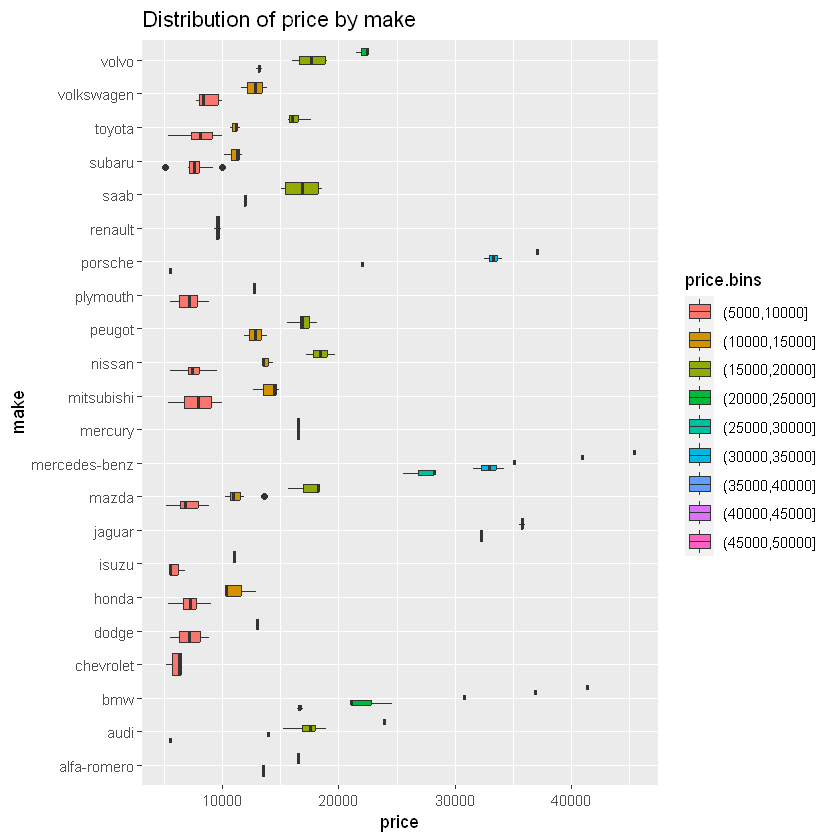

In [11]:
carIns_final %>%
   ggplot(aes(x = make,price, fill=price.bins)) +
   geom_boxplot() +
   ggtitle("Distribution of price by make") +
   coord_flip()

(k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


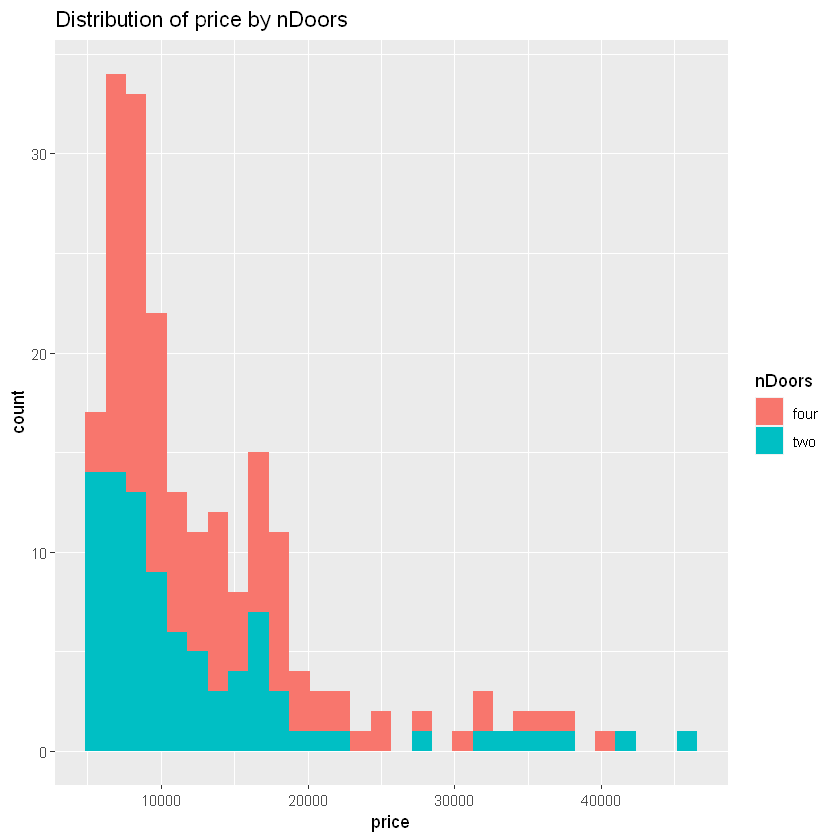

In [12]:
carIns_final %>%
   ggplot(aes(x = price, fill=nDoors)) +
   geom_histogram() +
   ggtitle("Distribution of price by nDoors")

(l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

Warning message:
"Using alpha for a discrete variable is not advised."


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


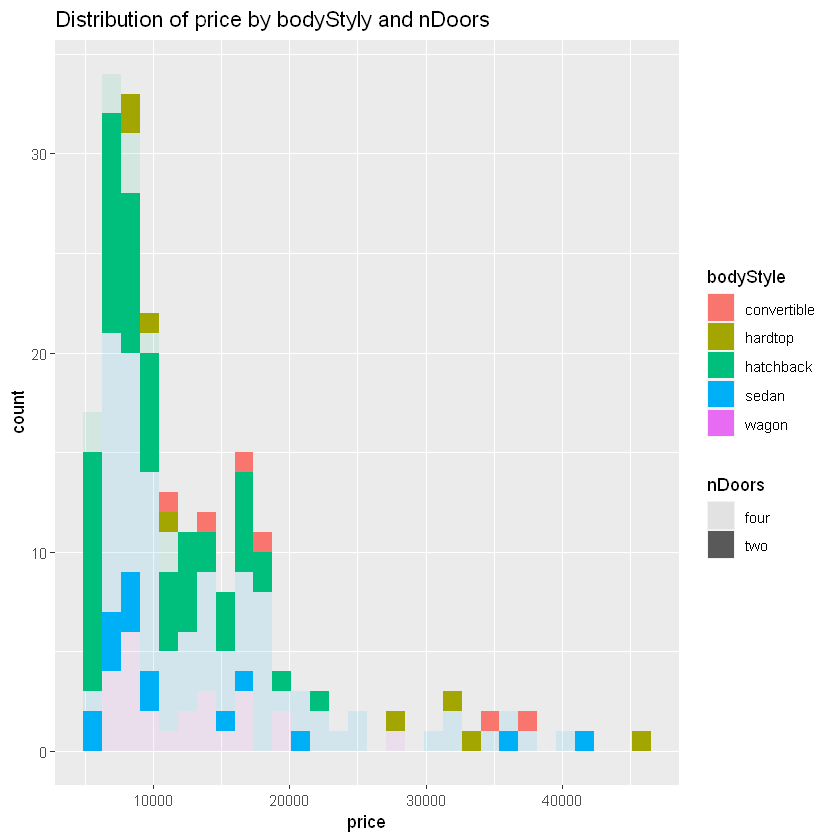

In [13]:
carIns_final %>%
   ggplot(aes(x = price, fill=bodyStyle, alpha=nDoors)) +
   geom_histogram() +
   ggtitle("Distribution of price by bodyStyly and nDoors")

(m) Add the parameter scales="free_y" to the facet function in the previous graph.

Warning message:
"Using alpha for a discrete variable is not advised."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


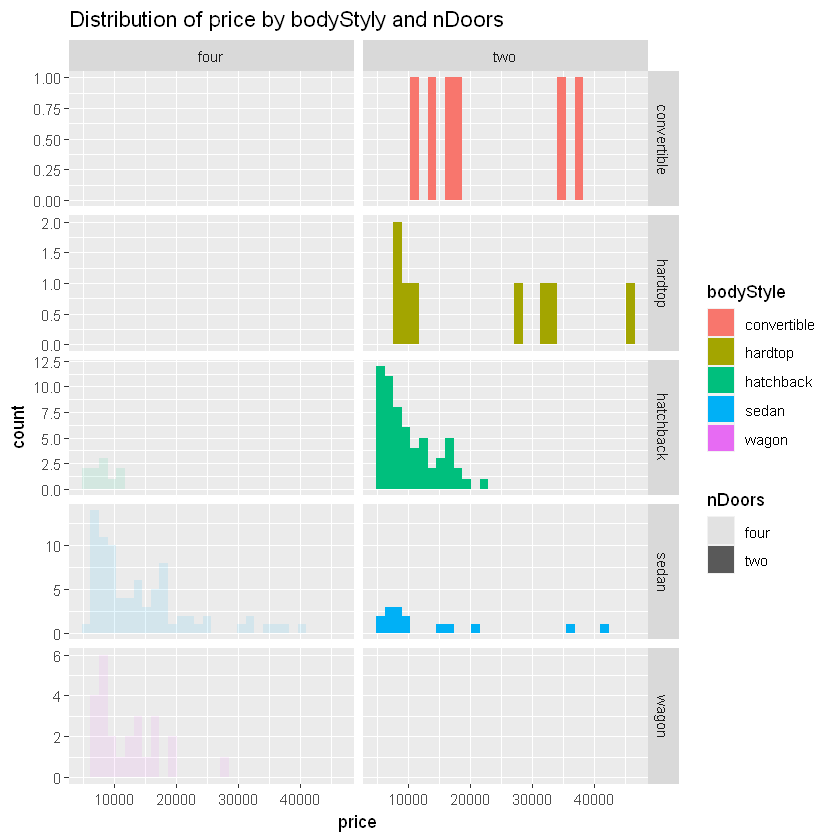

In [14]:
last_plot() + facet_grid(bodyStyle ~ nDoors, scales='free_y')